In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal
import seaborn as sns
import matplotlib.pyplot as plt
from astroNN.nn.layers import MCDropout



In [3]:
model = tf.keras.models.load_model('models/FFNN_Hz.h5')
ffnn_do = tf.keras.models.load_model('models/FFNN+MC-DO_Hz.h5', custom_objects={'MCDropout': MCDropout})

In [4]:
file = 'data/Hz31.txt'
data = pd.read_csv(file, names=['z', 'hz', 'err'], sep = " " )
z = data.values[:,0]
y = data.values[:,1:]
scalerz = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
scalerz.fit(z.reshape(-1,1))
# apply transform
# z = scalerz.transform(z.reshape(-1,1))

StandardScaler()

In [5]:
ranz = np.linspace(0, 5, 1000)
r = scalerz.transform(ranz.reshape(-1, 1))
pred_random = model.predict(r)
rr = scalerz.inverse_transform(r.reshape(-1,1))

(0.0, 5.0)

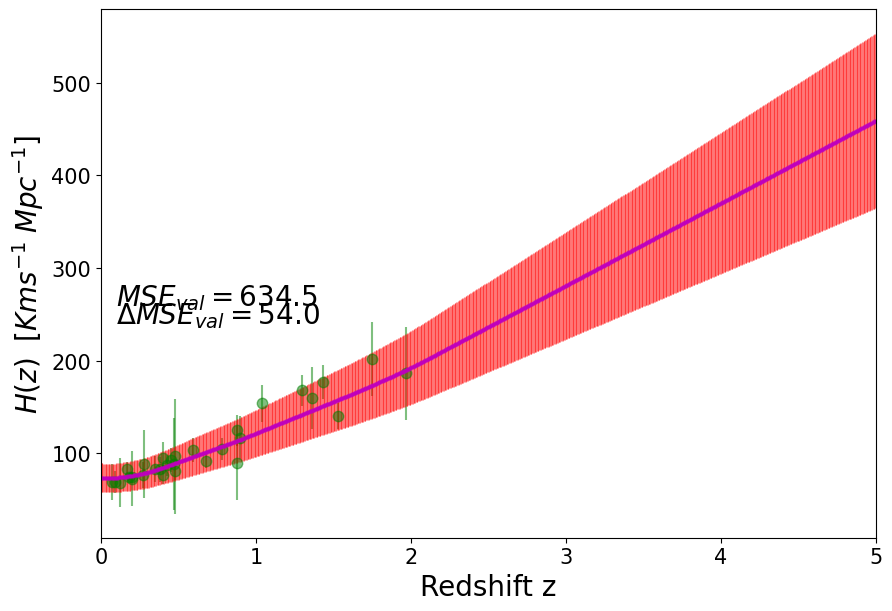

In [6]:
plt.figure(figsize=(10, 7), dpi=100)
plt.errorbar(z, y[:,0], y[:,1], fmt='g.', markersize=15, label='Observations', alpha=0.5)
plt.errorbar(ranz, pred_random[:,0], pred_random[:,1], markersize=2, fmt='o', 
             ecolor='r', capthick=2, elinewidth=0.8, alpha=0.5, c='m')
plt.xlabel("Redshift z", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.text( 0.1, 260, "$MSE_{val} =  634.5$", fontsize=20 )
plt.text( 0.1, 240, "$\Delta MSE_{val} = 54.0$", fontsize=20 )
plt.ylabel("$H(z) \;\; [Kms^{-1} \; Mpc^{-1}]$", fontsize=20)
plt.xlim(0, 5)